# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

In [ ]:
img = cv2.imread('../data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

In [ ]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

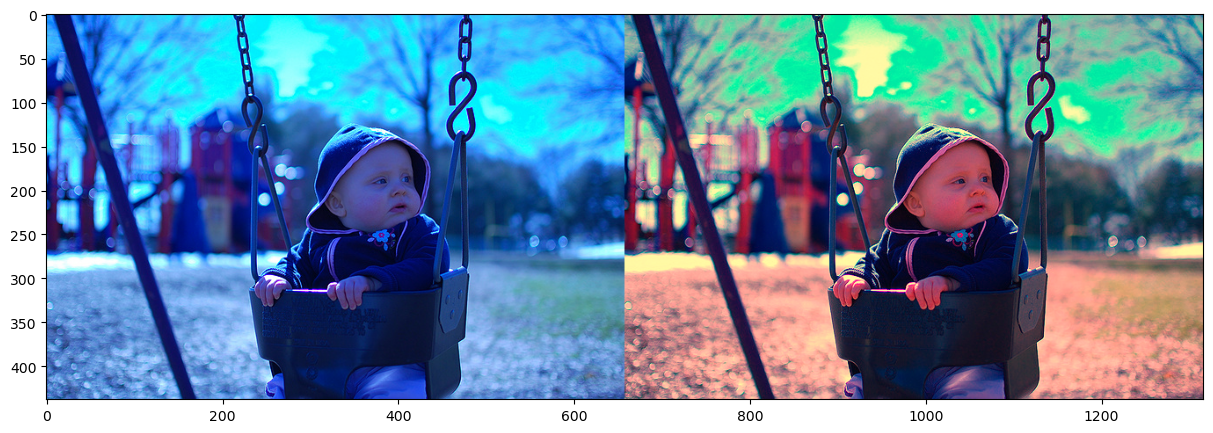

In [3]:
# Load your image
img = cv2.imread('data/white-balance-incorrect.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

balanced = np.zeros_like(img, dtype=np.float32)
img = img.astype(np.float32)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = img[..., 0].mean()
mean_g = img[..., 1].mean()
mean_b = img[..., 2].mean()

mean_gray = (mean_r + mean_g + mean_b) / 3.0

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
k_r = mean_gray / mean_r
k_g = mean_gray / mean_g
k_b = mean_gray / mean_b

# Apply color balancing and generate the balanced image
balanced[..., 0] = img[..., 0] * k_r
balanced[..., 1] = img[..., 1] * k_g
balanced[..., 2] = img[..., 2] * k_b 

# Show the original and the balanced image side by side
balanced = np.clip(balanced, 0, 255).astype(np.uint8)
comparison = cv2.hconcat([img.astype(np.uint8), balanced])
plt.imshow(comparison)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

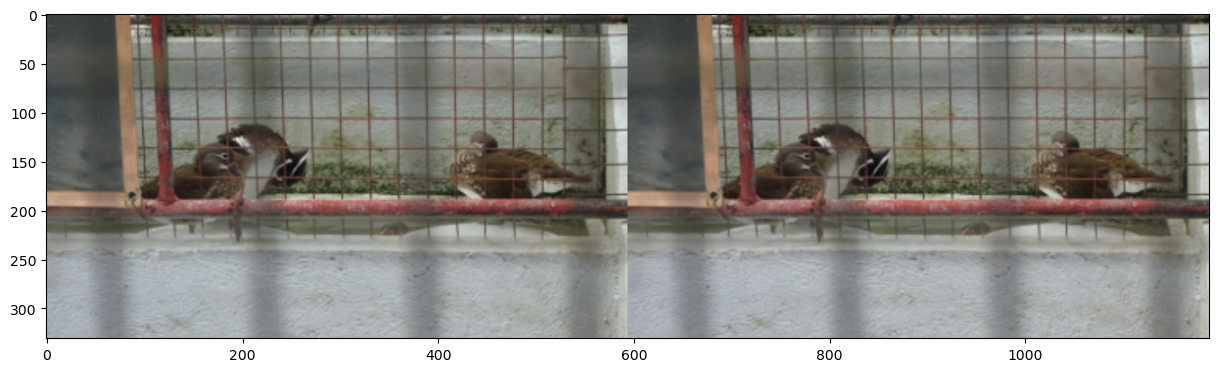

In [4]:
# Load your image
img = cv2.imread('data/scale_max_example.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
img_float = img.astype(np.float32)
max_r = np.max(img_float[:, :, 0])
max_g = np.max(img_float[:, :, 1])
max_b = np.max(img_float[:, :, 2])

max_all = max(max_b, max_g, max_r)
img_float[:, :, 0] *= max_all / max_r
img_float[:, :, 1] *= max_all / max_g
img_float[:, :, 2] *= max_all / max_b

# Apply scale-by-max balancing and generate the balanced image
balanced = np.clip(img_float, 0, 255).astype(np.uint8)

comparison = cv2.hconcat([img, balanced])
plt.imshow(comparison)